# Imports Overview

In [206]:
# Data fetching
import yfinance as yf          # download stock market data

# Data handling
import pandas as pd            # tabular data manipulation
import numpy as np             # numerical computations

# Visualization
import matplotlib.pyplot as plt  # basic plotting
%matplotlib inline
import seaborn as sns            # statistical/advanced visualization

# Date and time
from datetime import datetime    # handle timestamps and date operations

# Date Range Setup

- **end_date**: Today's date and time.  
- **start_date**: Same day and month, but 20 years earlier.


In [207]:
# today's date and time
end_date = datetime.now()  

# same day and month but 20 years earlier
start_date = datetime(end_date.year - 20, end_date.month, end_date.day)  

# Download Google Stock Data

In [208]:
# Define stock ticker symbol
stock = "GOOG"  

# Download historical stock data from Yahoo Finance (unadjusted)
google_data = yf.download(stock, start_date, end_date, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


# Close vs Adjusted Close

- **Close**: Raw closing price of the stock for the day.  
- **Adj Close**: Closing price adjusted for **splits, dividends, and distributions**, representing the true investment value.

In [209]:
google_data.head()

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          GOOG      GOOG      GOOG      GOOG      GOOG       GOOG
Date                                                                   
2005-09-01  7.087398  7.129527  7.160660  7.098393  7.121059  110095123
2005-09-02  7.141868  7.184321  7.222678  7.134259  7.136003  137894934
2005-09-06  7.108691  7.150946  7.207734  7.143225  7.198020  169123549
2005-09-07  7.300825  7.344222  7.359913  7.105367  7.120560  301104399
2005-09-08  7.313701  7.357174  7.454060  7.306613  7.343226  265523531

# Data Analysis

1. **Dataset Shape**
   - `google_data.shape`: (5032, 6) → 5032 rows (days) and 6 columns (Open, High, Low, Close, Adj Close, Volume)

In [210]:
google_data.shape

(5030, 6)

2. **Summary Statistics**
- `google_data.describe()`: Provides statistical overview of numerical columns:
  - **count**: Number of non-missing entries  
  - **mean**: Average value  
  - **std**: Standard deviation  
  - **min / max**: Minimum and maximum values  
  - **25%, 50%, 75%**: Quartiles

In [211]:
google_data.describe()

Price     Adj Close        Close         High          Low         Open  \
Ticker         GOOG         GOOG         GOOG         GOOG         GOOG   
count   5030.000000  5030.000000  5030.000000  5030.000000  5030.000000   
mean      54.152303    54.435692    54.996764    53.856303    54.410714   
std       51.234627    51.445295    52.000150    50.877180    51.407798   
min        6.374078     6.411966     6.709103     6.159413     6.538243   
25%       14.091666    14.175429    14.296414    14.051145    14.183151   
50%       31.391901    31.578500    31.870749    31.247500    31.641251   
75%       75.504814    75.953623    76.726202    75.326227    75.782248   
max      213.529999   213.529999   215.339996   210.970001   211.270004   

Price         Volume  
Ticker          GOOG  
count   5.030000e+03  
mean    9.455762e+07  
std     1.184067e+08  
min     1.584340e+05  
25%     2.561000e+07  
50%     4.401612e+07  
75%     1.174938e+08  
max     1.650833e+09

3. **Dataset Info**
- `google_data.info()`: Displays dataset structure:
  - Column names and data types  
  - Number of non-null entries per column  
  - Memory usage of the DataFrame

In [212]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 2005-09-01 to 2025-08-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5030 non-null   float64
 1   (Close, GOOG)      5030 non-null   float64
 2   (High, GOOG)       5030 non-null   float64
 3   (Low, GOOG)        5030 non-null   float64
 4   (Open, GOOG)       5030 non-null   float64
 5   (Volume, GOOG)     5030 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


4. **Data Quality**
   - **No Null Values**: The dataset contains no missing or NaN entries.

In [213]:
google_data.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

# Data Visualization

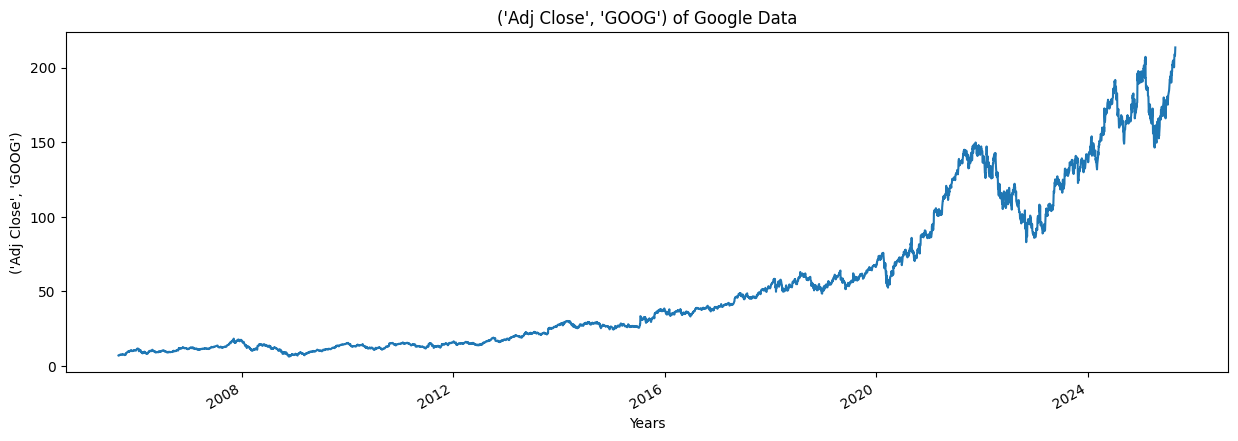

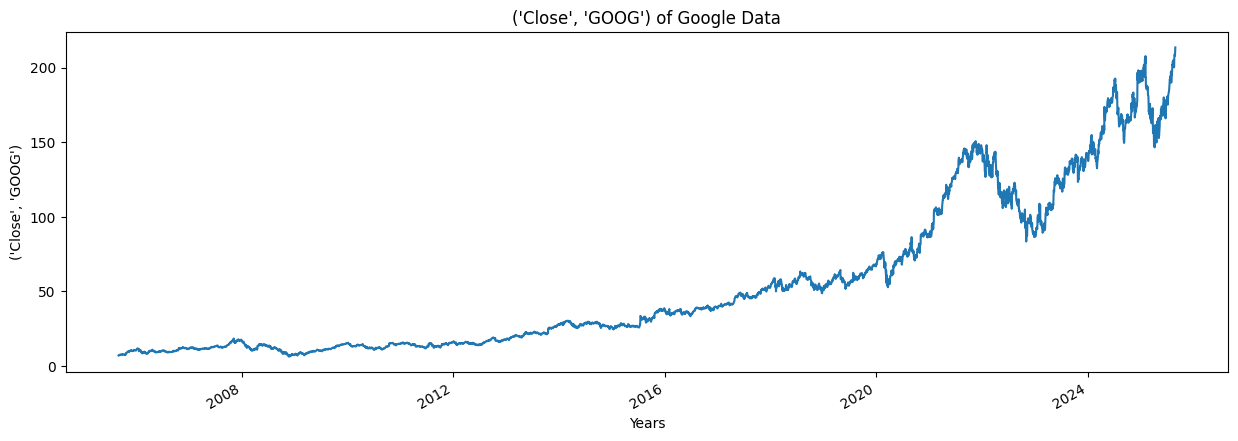

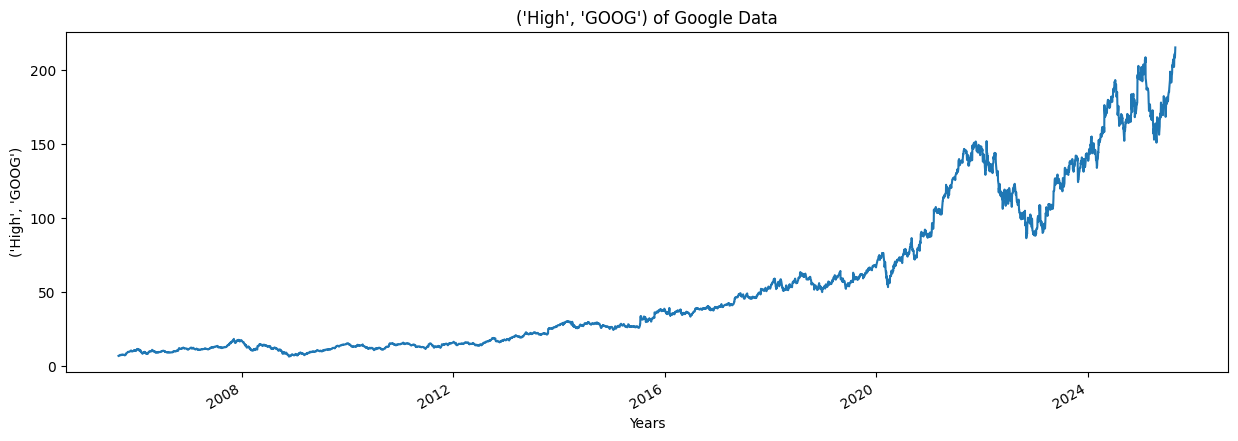

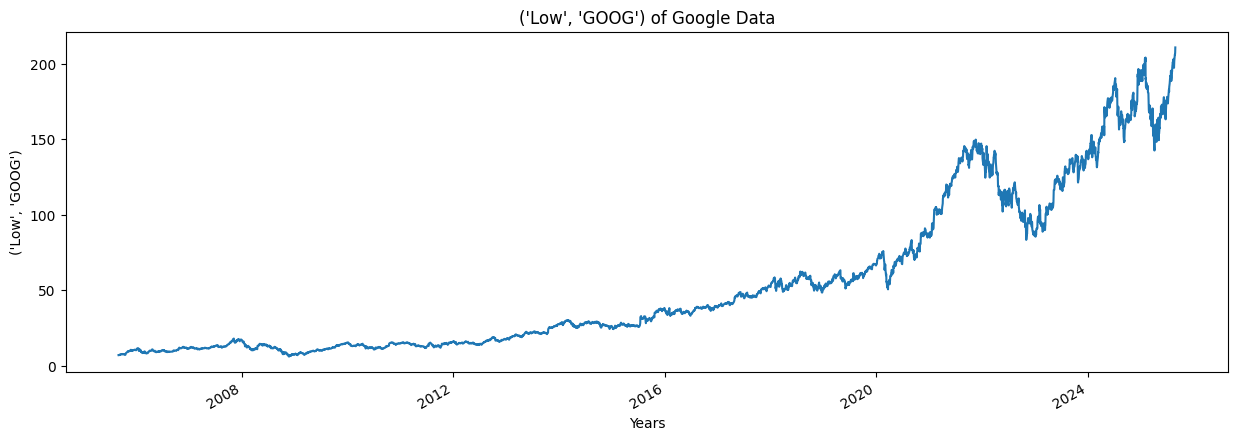

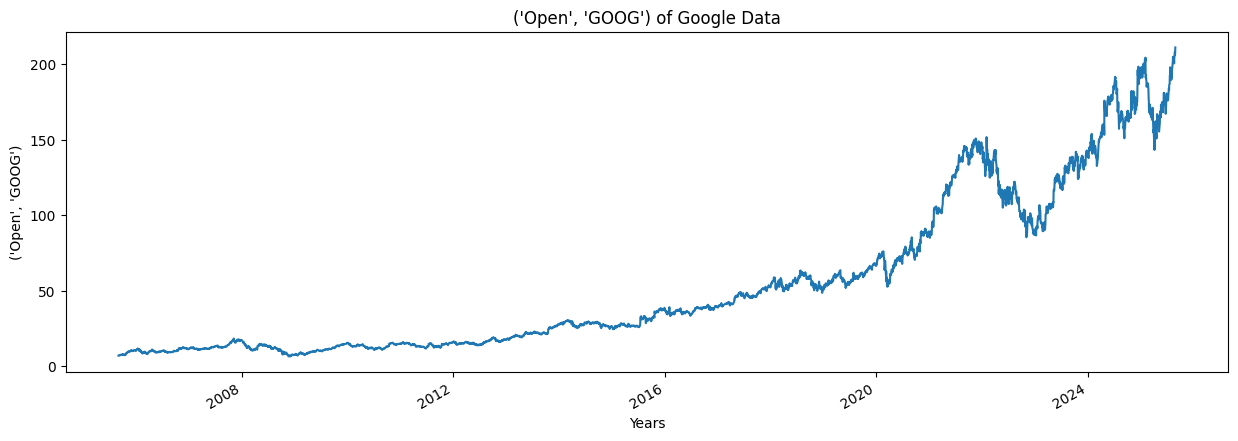

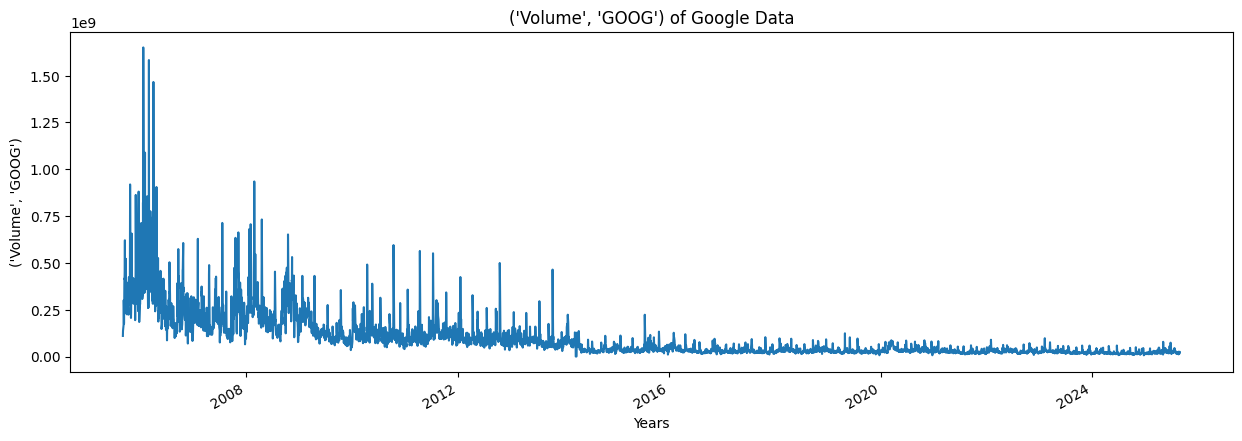

In [215]:
# Plot all columns of google_data using the plot_graph function
for column in google_data.columns:
    plt.figure(figsize=(15,5))
    google_data[column].plot()
    plt.xlabel("Years")
    plt.ylabel(column)
    plt.title(f"{column} of Google Data")
    plt.show()

# Moving Average

- **Definition**: The average of a stock's price over a specific number of past periods.  
- **Purpose**: Smooths out short-term fluctuations and highlights trends.  


1. Yearly Data Count

In [219]:
years = range(2005, 2025)                     # Years to check
yearly_counts = list(google_data.index.year)  # Extract years from index

for year in years:
    print(year, yearly_counts.count(year))

2005 84
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [217]:
# 250-Day Moving Average
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [218]:
# Inspect Initial Moving Average Values
google_data['MA_for_250_days'][0:250].tail()

Date
2006-08-23         NaN
2006-08-24         NaN
2006-08-25         NaN
2006-08-28         NaN
2006-08-29    9.456904
Name: MA_for_250_days, dtype: float64

2. 250-Day Moving Average Plot

- **Figure Size**: 15x5 inches  
- **X-axis**: Time (Years)  
- **Y-axis**: 250-day moving average values  
- **Title**: "MA_for_250_days of Google Data"  
- **Purpose**: Shows the smoothed long-term trend of Google’s stock price.

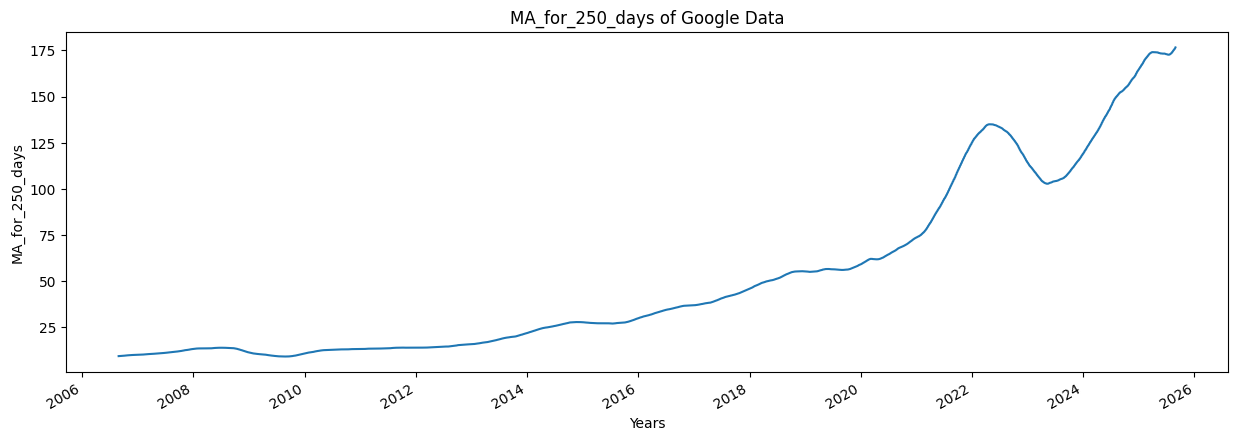

In [220]:
plt.figure(figsize=(15,5))
google_data['MA_for_250_days'].plot()
plt.xlabel("Years")
plt.ylabel("MA_for_250_days")
plt.title("MA_for_250_days of Google Data")
plt.show()

3. Plot Adj Close and 250-Day Moving Average
- **Figure Size**: 15x5 inches  
- **X-axis**: Time (Years)  
- **Y-axis**: Stock prices  
- **Lines Plotted**:  
  - **Adj Close**: Daily adjusted closing price  
  - **MA_for_250_days**: 250-day moving average  
- **Purpose**: Visualize the daily fluctuations of Google’s stock alongside its long-term trend.

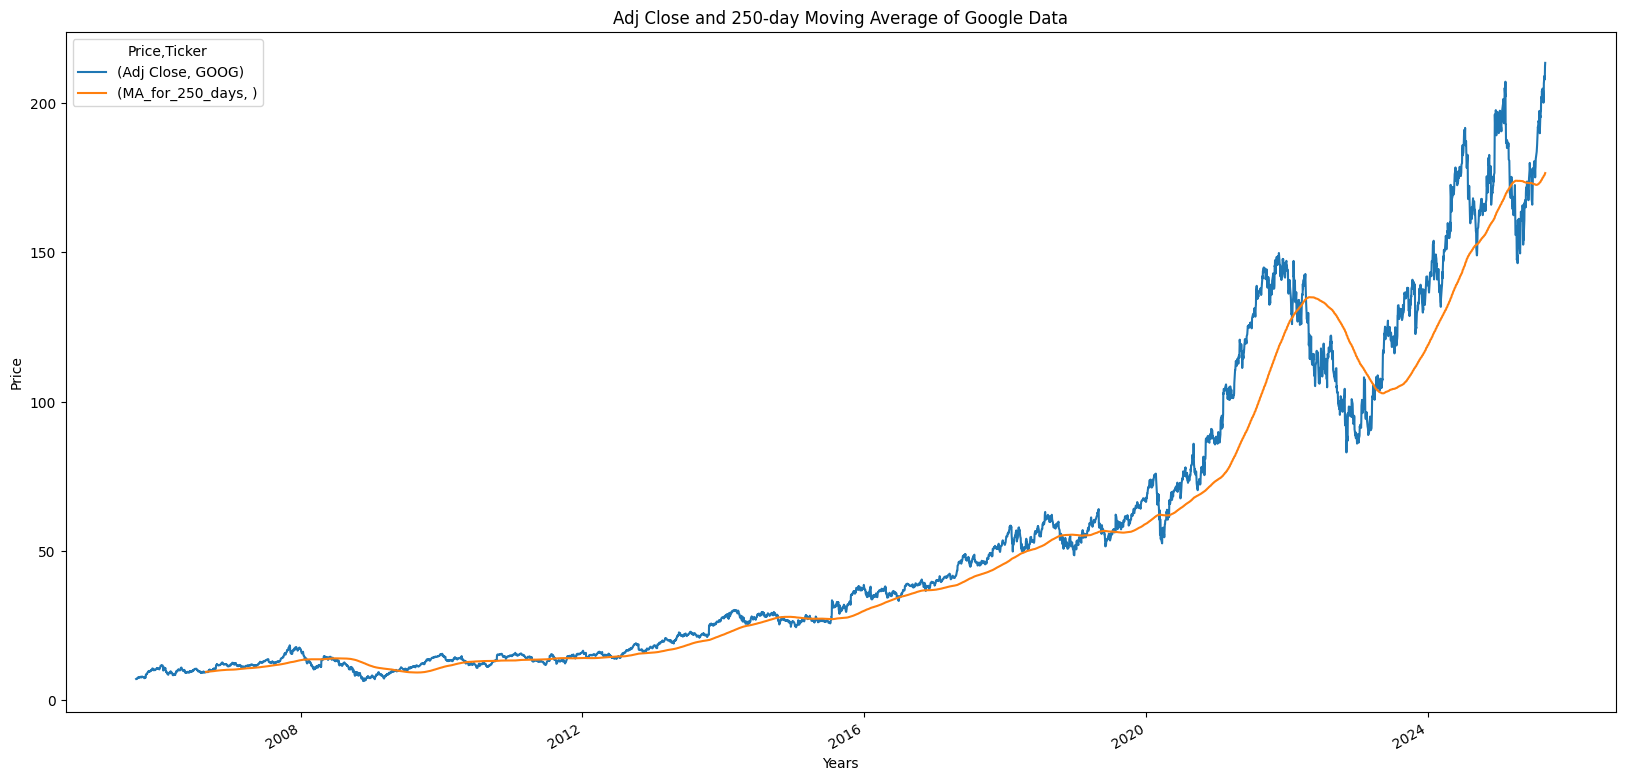

In [222]:
google_data[['Adj Close', 'MA_for_250_days']].plot(figsize=(20,10))
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Adj Close and 250-day Moving Average of Google Data")
plt.show()

4. 100-Day Moving Average Plot

- **Figure Size**: 15x5 inches  
- **X-axis**: Time (Years)  
- **Y-axis**: Stock prices  
- **Lines Plotted**:  
  - **Adj Close**: Daily adjusted closing price  
  - **MA_for_100_days**: 100-day moving average  

- **Purpose**: Visualize the short-term trend of Google’s stock by smoothing daily price fluctuations over 100 trading days.

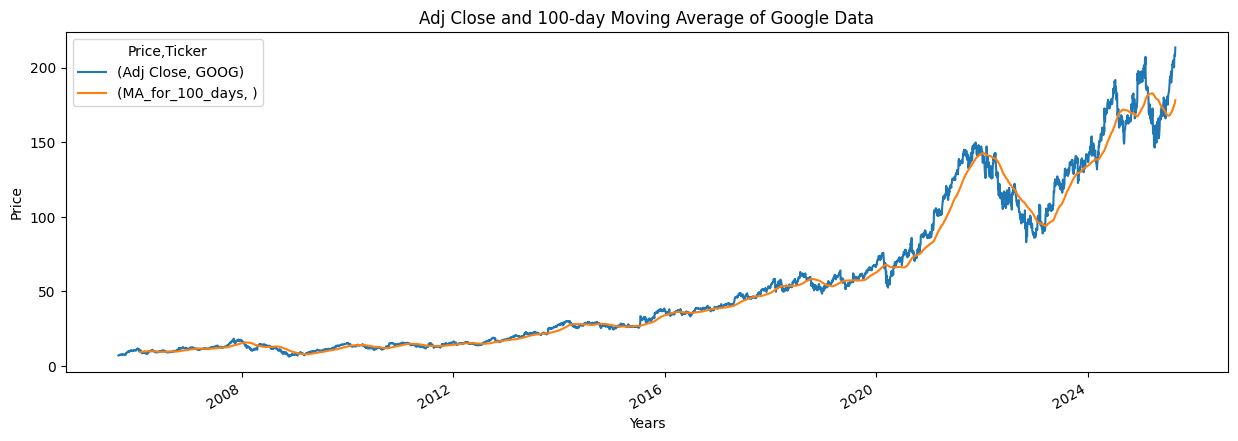

In [223]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
google_data[['Adj Close', 'MA_for_100_days']].plot(figsize=(15,5))
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Adj Close and 100-day Moving Average of Google Data")
plt.show()

5. Adj Close with 100-Day and 250-Day Moving Averages

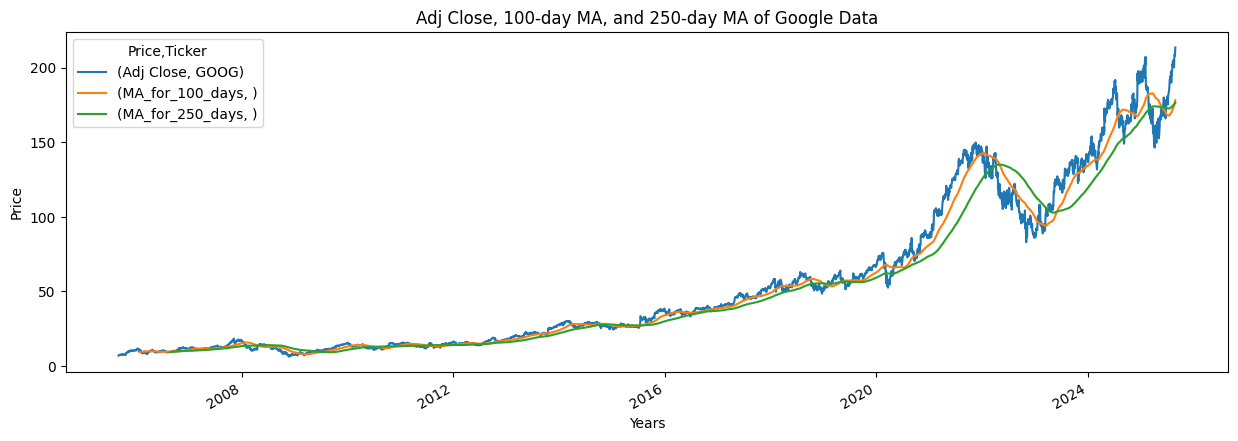

In [224]:
google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']].plot(figsize=(15,5))
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Adj Close, 100-day MA, and 250-day MA of Google Data")
plt.show()


In [225]:
# Daily Percentage Change in Adjusted Close
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close', 'percentage_change_cp']].head()

Price      Adj Close percentage_change_cp
Ticker          GOOG                     
Date                                     
2005-09-01  7.087398                  NaN
2005-09-02  7.141868             0.007685
2005-09-06  7.108691            -0.004645
2005-09-07  7.300825             0.027028
2005-09-08  7.313701             0.001764

6. Daily Percentage Change Plot

- **Figure Size**: 15x5 inches  
- **X-axis**: Time (Years)  
- **Y-axis**: Daily percentage change in adjusted closing price  
- **Line Plotted**: `percentage_change_cp`  

- **Purpose**: Visualize day-to-day returns of Google’s stock, highlighting volatility and fluctuations.


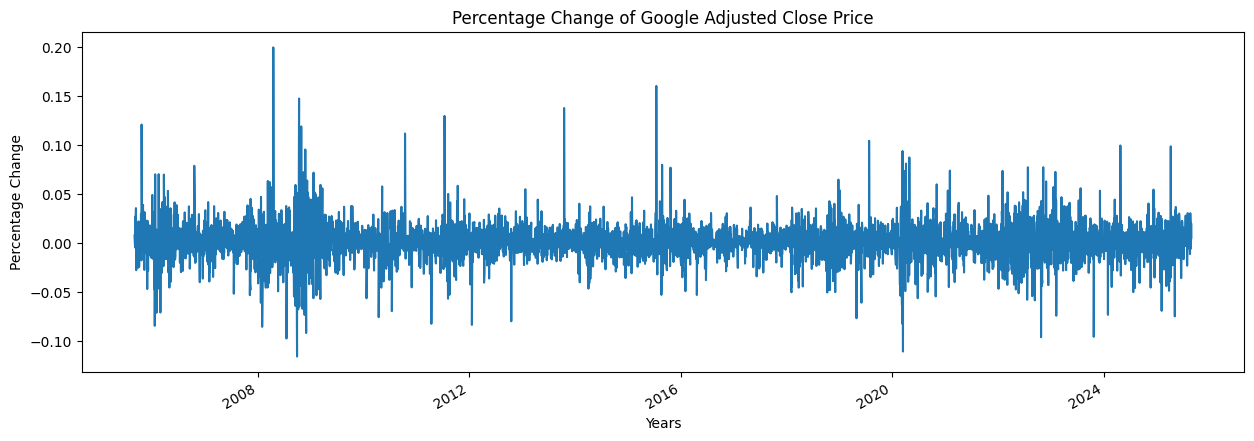

In [226]:
google_data['percentage_change_cp'].plot(figsize=(15,5))
plt.xlabel("Years")
plt.ylabel("Percentage Change")
plt.title("Percentage Change of Google Adjusted Close Price")
plt.show()


# Data Preprocessing

In [227]:
# Extract Adjusted Close Column
Adj_close_price = google_data[['Adj Close']]

1. Min-Max Scaling of Adjusted Close Price

- **Library**: `sklearn.preprocessing.MinMaxScaler`  
- **Scaler Setup**: `feature_range=(0,1)` → scales values between 0 and 1.  
- **Input**: `Adj_close_price` (Google’s adjusted closing price).  
- **Output**: `scaled_data` → normalized values of adjusted close prices.  

- **Purpose**: Normalization makes all values lie within the same scale, which is especially useful for machine learning models like neural networks.


In [228]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.0034434 ],
       [0.00370634],
       [0.00354618],
       ...,
       [0.9743189 ],
       [0.99440034],
       [1.        ]])

2. Time Series Data Preparation

- **input_sequences**: Stores rolling windows of the previous 250 days of scaled adjusted close prices.  
- **target_values**: Stores the price of the next day corresponding to each 250-day input window.  

- **Purpose**: Prepares the dataset for training a time series model, where the past 250 days are used to predict the following day’s stock price.


In [229]:
input_sequences = []
target_values = []

for i in range(250, len(scaled_data)):
    input_sequences.append(scaled_data[i-250:i])  # last 250 days
    target_values.append(scaled_data[i])          # next day value

In [230]:
# Convert to NumPy Arrays
input_sequences, target_values = np.array(input_sequences), np.array(target_values)

In [231]:
input_sequences

array([[[0.0034434 ],
        [0.00370634],
        [0.00354618],
        ...,
        [0.01384292],
        [0.01476203],
        [0.01452299]],

       [[0.00370634],
        [0.00354618],
        [0.00447367],
        ...,
        [0.01476203],
        [0.01452299],
        [0.01473813]],

       [[0.00354618],
        [0.00447367],
        [0.00453582],
        ...,
        [0.01452299],
        [0.01473813],
        [0.01447279]],

       ...,

       [[0.76855638],
        [0.75952438],
        [0.75423975],
        ...,
        [0.96712622],
        [0.9789048 ],
        [0.97306376]],

       [[0.75952438],
        [0.75423975],
        [0.76245496],
        ...,
        [0.9789048 ],
        [0.97306376],
        [0.9743189 ]],

       [[0.75423975],
        [0.76245496],
        [0.73122759],
        ...,
        [0.97306376],
        [0.9743189 ],
        [0.99440034]]])

In [232]:
target_values

array([[0.01473813],
       [0.01447279],
       [0.01448115],
       ...,
       [0.9743189 ],
       [0.99440034],
       [1.        ]])

# Train-Test Split for Time Series Data

- **splitting_length**: 70% of total sequences used to separate training and testing data.  

- **Training Set**:  
  - `X_train`: First 70% of input sequences  
  - `y_train`: Corresponding target values  

- **Testing Set**:  
  - `X_test`: Remaining 30% of input sequences  
  - `y_test`: Corresponding target values  

- **Purpose**: Prepare data for model training and evaluation, ensuring the model is validated on unseen future data.


In [158]:
splitting_length = int(len(input_sequences)*0.7)
X_train = input_sequences[:splitting_length]
y_train = target_values[:splitting_length]

X_test = input_sequences[splitting_length:]
y_test = target_values[splitting_length:]

In [159]:
# Dataset Shapes After Splitting
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3346, 250, 1)
(3346, 1)
(1434, 250, 1)
(1434, 1)


# Import Keras Modules for Model Building

- **Sequential**: Defines a linear stack of layers to build a neural network.  
- **Dense**: Fully connected layer where each neuron receives input from all neurons in the previous layer.  
- **LSTM**: Long Short-Term Memory layer, a type of recurrent neural network (RNN) suitable for time series data.  

- **Purpose**: These imports are used to create and train a neural network model for predicting stock prices.

In [255]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Input, Dropout

In [277]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# LSTM Model Architecture

This is a **Sequential LSTM model** for **time series prediction**.

## Layer Details

| Layer        | Type   | Neurons | Return Sequences |
|--------------|--------|--------|-----------------|
| Input + LSTM | LSTM   | 128    | True            |
| Hidden LSTM  | LSTM   | 64     | False           |
| Dense        | Dense  | 25     | -               |
| Output       | Dense  | 1      | -               |

**Explanation:**  
- **Input LSTM:** Takes sequences of shape `(timesteps, 1 feature)` and outputs full sequence to the next LSTM.  
- **Hidden LSTM:** Reduces features from 128 → 64, outputs last timestep only.  
- **Dense layer:** Maps features to 25 neurons.  
- **Output layer:** Dense layer with 1 neuron for single-value prediction (e.g., stock price).  
- No dropout layers here, so model may overfit on small datasets.

In [295]:
model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1],1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))

# Compile LSTM Model

- **Optimizer**: `adam` → Adaptive learning rate optimization algorithm.  
- **Loss Function**: `mean_squared_error` → Measures the average squared difference between predicted and actual values.  

- **Purpose**: Prepares the model for training by specifying how it should update weights and evaluate performance.

In [296]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [298]:
model.fit(X_train, y_train, batch_size=8, epochs=5)

Epoch 1/5
419/419 ━━━━━━━━━━━━━━━━━━━━ 53s 120ms/step - loss: 2.2777e-05
Epoch 2/5
419/419 ━━━━━━━━━━━━━━━━━━━━ 52s 123ms/step - loss: 2.2251e-05
Epoch 3/5
419/419 ━━━━━━━━━━━━━━━━━━━━ 52s 124ms/step - loss: 2.0030e-05
Epoch 4/5
419/419 ━━━━━━━━━━━━━━━━━━━━ 55s 131ms/step - loss: 2.2370e-05
Epoch 5/5
419/419 ━━━━━━━━━━━━━━━━━━━━ 51s 122ms/step - loss: 2.1304e-05


# LSTM Model Summary

| Layer (type)    | Output Shape      | Param #   |
|-----------------|-----------------|-----------|
| LSTM (lstm_32)  | (None, 250, 128)| 66,560    |
| LSTM (lstm_33)  | (None, 64)      | 49,408    |
| Dense (dense_23)| (None, 25)      | 1,625     |
| Dense (dense_24)| (None, 1)       | 26        |

**Notes:**  
- First LSTM outputs a sequence `(250 timesteps, 128 features)` to the second LSTM.  
- Second LSTM outputs last timestep with 64 features.  
- Dense layers reduce features to 25, then to 1 for final prediction.  
- No Dropout layers are included, so model may overfit on small datasets.

In [306]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 250, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

# Predicting the Test Data

In [307]:
predictions = model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


In [308]:
predictions

array([[0.2880801 ],
       [0.28908587],
       [0.28980166],
       ...,
       [0.935247  ],
       [0.93975073],
       [0.94642216]], dtype=float32)

In [309]:
inverse_predictions = scaler.inverse_transform(predictions)
inverse_predictions

array([[ 66.051575],
       [ 66.259926],
       [ 66.4082  ],
       ...,
       [200.11603 ],
       [201.04901 ],
       [202.43103 ]], dtype=float32)

In [310]:
inverse_y_test = scaler.inverse_transform(y_test)
inverse_y_test

array([[ 67.65633426],
       [ 67.35562167],
       [ 67.23137698],
       ...,
       [208.21000673],
       [212.36999512],
       [213.52999878]])

- **Parameters**:  
  - **inverse_y_test**: Actual stock prices  
  - **inverse_predictions**: Predicted stock prices  
  - **squared=False**: Return the square root directly  

- **Purpose**: Computes the Root Mean Squared Error (RMSE), providing a standardized measure of prediction accuracy.

In [311]:
rmse = np.sqrt(np.mean((inverse_predictions - inverse_y_test) ** 2))

In [312]:
rmse

4.139574270444356

In [313]:
plotting_data = pd.DataFrame(
    {
        'Original_test_data': inverse_y_test.reshape(-1),
        'predictions': inverse_predictions.reshape(-1),
    },
    index=google_data.index[splitting_length+250:]
)

plotting_data.head()

Original_test_data  predictions
Date                                       
2019-12-16           67.656334    66.051575
2019-12-17           67.355622    66.259926
2019-12-18           67.231377    66.408203
2019-12-19           67.401352    66.487625
2019-12-20           67.080765    66.548668

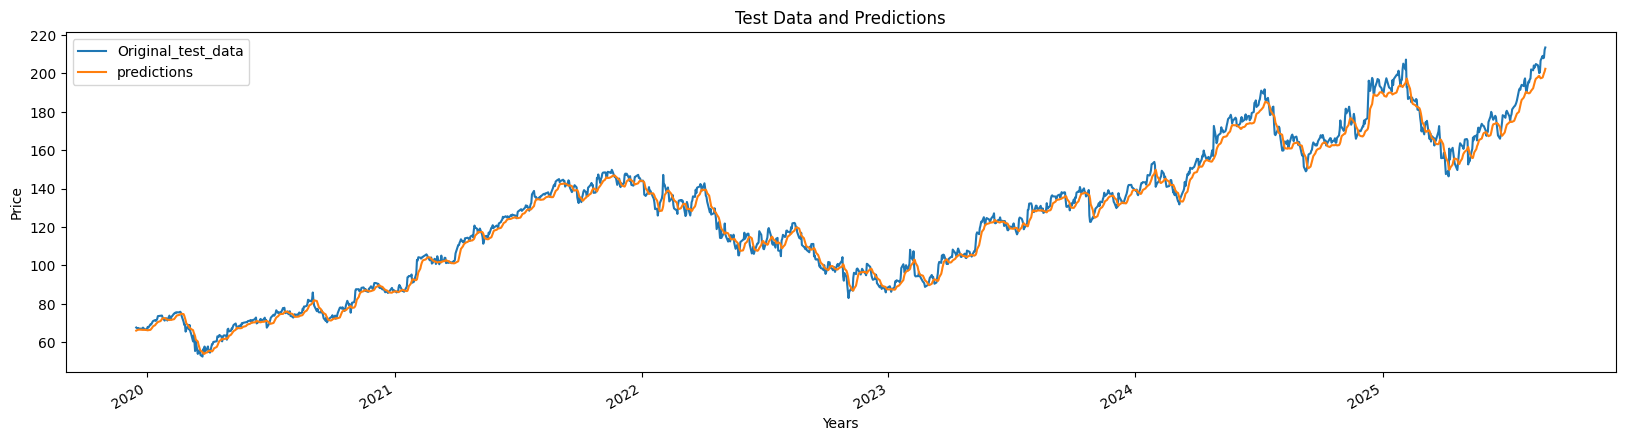

In [314]:
plotting_data.plot(figsize=(20,5))
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Test Data and Predictions")
plt.show()


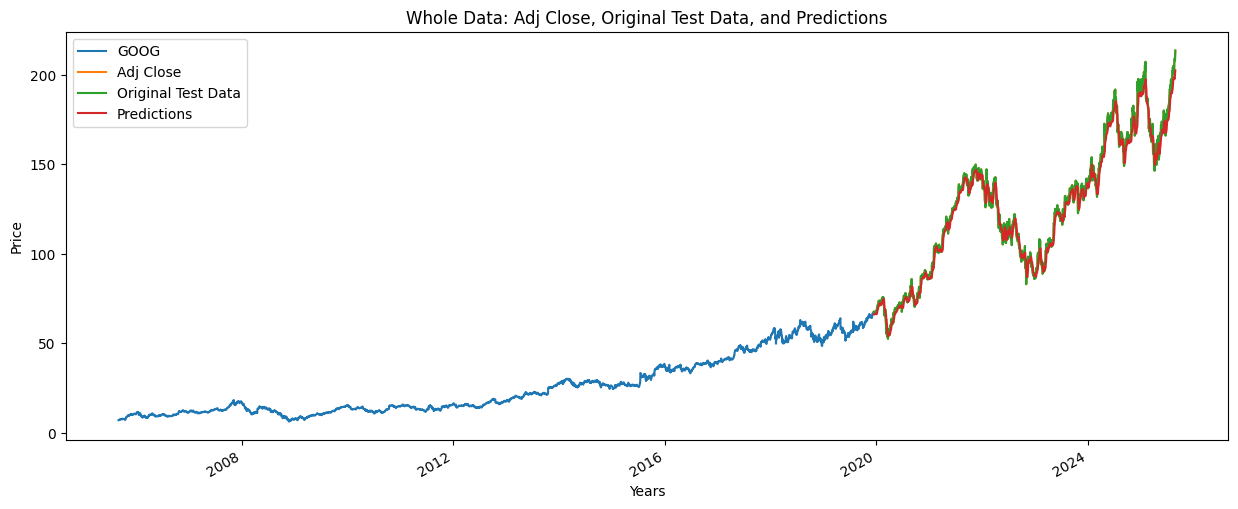

In [315]:
# Historical Adj Close up to test period
adj_close_history = google_data['Adj Close'][:splitting_length+250]

# Flatten the test period Adj Close, original test data, and predictions
adj_close_test = google_data['Adj Close'].iloc[splitting_length+250:].values.flatten()
original_test_flat = inverse_y_test.flatten()
predictions_flat = inverse_predictions.flatten()

# Create DataFrame for test period
test_and_predictions = pd.DataFrame({
    'Adj Close': adj_close_test,
    'Original Test Data': original_test_flat,
    'Predictions': predictions_flat
}, index=google_data.index[splitting_length+250:])

# Concatenate history and test/predictions
whole_data = pd.concat([adj_close_history, test_and_predictions], axis=0)

# Plot
whole_data.plot(figsize=(15,6))
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Whole Data: Adj Close, Original Test Data, and Predictions")
plt.show()


In [316]:
model.save("Stock_Price_Model.keras")